# Pre-trained Networks
<hr style="border:2px solid black">

## 1. Introduction

### 1.1 Pre-trained models

**What is a pre-trained network?**
>- an existing deep neural network already trained on a large dataset
>- large model trained for a particular task: image classification, text generation etc.

**Why pre-trained networks?**
>- direct prediction without training
>- feature extraction for traing another model, e.g., SVM 
>- transfer learning for a similar task

### 1.2 Examples

**Computer Vision**
>- VGG16
>- MobileNetV2
>- ResNet50

**Natural Language Processing**
>- Bert (Google)
>- GPT-3 (OpenAI)

<hr style="border:2px solid black">

## 2. Image Classification Models

[`ImageNet`](https://www.image-net.org/about.php) 
>- database of 14 million human-annotated images
>- used in the ImageNet Large-Scale Visual Recognition Challenge (ILSVRC)
>- deep neural networks trained on 1M+ images that can classify images into 1000 object categories

[`Keras Applications`](https://keras.io/api/applications/#available-models) 
>- deep learning models made available alongside pre-trained weights
>- can be used for prediction, feature extraction, and transfer learning

### 2.1 Import ImageNet Models

**Load packages**

In [1]:
# data analysis stack
import numpy as np
import pandas as pd

# data visualization stack
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# miscellaneous
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# deep learning stack
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.preprocessing import image

In [2]:
# tensorflow and keras version
print(f'TensorFlow version: {tf.__version__}')
print(f'Keras version: {tf.keras.__version__}')

TensorFlow version: 2.9.1
Keras version: 2.9.0


#### Load models

In [3]:
# vgg16
from tensorflow.keras.applications.vgg16 import (
    VGG16,
    preprocess_input as ppi_vgg16
)

# resnet50
from tensorflow.keras.applications.resnet50 import (
    ResNet50,
    preprocess_input as ppi_resnet50,
    decode_predictions
)

# mobilenet_v2
from tensorflow.keras.applications.mobilenet_v2 import (
    MobileNetV2,
    preprocess_input as ppi_mobilenet_v2
)

### 2.2 Example: [VGG16](https://keras.io/api/applications/vgg/#vgg16-function)

>- CNN that won ImageNet Object Localisation and Classification Challenge (2014)
>- one can load pretrained version of the network trained on images from the ImageNet database
>- pretrained network can classify images into 1000 object categories
>- learned rich feature representations for a wide range of images

<img src="vgg16-neural-network.jpg" width="600"/>

<br>

>- image input size $224\times224$
>- pre-trained model with 138.4M parameters
>- convolutional layers use $3\times3$ filter with padding
>- max pooling with pool of 2 and stride of 2
>- 16 layer deep:
    + 2 convolutional layers, 64 filters (+ max pooling layer)
    + 2 convolutional layers, 128 filters (+ max pooling layer)
    + 3 convolutional layers with 256 filters (+ max pooling layer)
    + 3 convolutional layers, 512 filters (+ max pooling layer)
    + 3 convolutional layers, 512 filters (+ max pooling layer + flatten layer)
    + 2 dense layers
    + 1 softmax layer

**Instantiate model**

In [4]:
vgg16_model = VGG16(
    include_top=True,
    weights='imagenet',
    classes=1000
)

**Model summary**

In [5]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

**Parameter count**

`input layer` 
- $\text{no learning; zero parameters}$

`convolutional layer` 
- $\text{no_of_parameters} = (\text{filter_width}\times\text{filter_height}\times\text{no_of_channels})
\times\text{no_of_filters} + \text{no_of_biases}$


In [6]:
# first convolutional layer in block 1
conv_layer_1_params = (3*3*3)*64 + 64
conv_layer_1_params

1792

In [7]:
# second convolutional layer in block 1
conv_layer_2_params = (3*3*64)*64 + 64
conv_layer_2_params

36928

<hr style="border:2px solid black">

## 3. Usage Examples

**Global variables**

In [8]:
IMAGE_NAMES = [
    'desert_fox',
    'putin',
    'quokka',
    'seaworm',
    'tram',
    'trilobit',
    'wombat'
]

In [9]:
# input preprocessing for various models 
PPI = {
    'vgg16': ppi_vgg16,
    'resnet50': ppi_resnet50,
    'mobilenet_v2': ppi_mobilenet_v2
}

#### User-defined functions

In [10]:
def give_image_path(image_name):
    """
    gives image path from an image name
    """
    img_dir = './data/'
    img_file = image_name + '.jpg'
    img_path = img_dir + img_file
    
    return img_path

In [11]:
def load_image(image_path):
    """
    loads an input image into PIL format of size 224 X 224
    """
    img = image.load_img(
        path=image_path,
        target_size=(224,224)
    )
    return img

In [12]:
def batch_image(loaded_image):
    """
    converts a loaded image to a batch
    """
    img_array = image.img_to_array(loaded_image)
    img_batch = np.array([img_array])
    
    return img_batch

In [13]:
def preprocess_image(batched_image, model:'str'):
    """
    preprocesses a batch image for a given model
    """
    processed_img = PPI[model](batched_image)
    
    return processed_img

In [14]:
def show_preprocess_image(image_name, model:'str'):
    """
    shows a loaded image and preprocesses it for a given model
    """
    # create image path
    img_path = give_image_path(image_name)
    
    # load resized image
    loaded_img = load_image(img_path)
    
    # display image
    plt.figure(figsize=(3,3), dpi=100)
    plt.imshow(loaded_img)
    
    # create batched image
    batch_img = batch_image(loaded_img)
    
    # preprocess image
    processed_img = preprocess_image(batch_img, model)
    
    return processed_img

### 3.1  Prediction with [ResNet50](https://keras.io/api/applications/resnet/#resnet50-function)

**Instantiate model**

In [15]:
resnet50_model = ResNet50(
    include_top=True,
    weights="imagenet",
    classes=1000
)

**Model summary**

In [16]:
resnet50_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

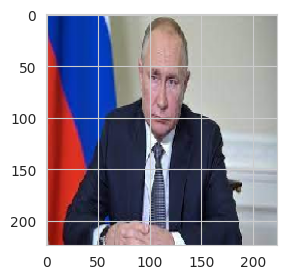

In [18]:
# show loaded image
putin_image = show_preprocess_image('putin', 'resnet50')

In [17]:
def image_class_prediction(model, preprocessed_image):
    """
    spits out the top-5 predictions of a given model with a proprocessed image
    """
    model_prediction = model.predict(preprocessed_image,verbose=0)
    decoded_prediction = decode_predictions(model_prediction,top=5)[0]
    data = {
        'image_class': [_[1] for _ in decoded_prediction],
        'probability': [_[2] for _ in decoded_prediction]
    }
    df = pd.DataFrame(data=data)
    return df

In [19]:
# class prediction
image_class_prediction(resnet50_model, putin_image)

,image_class,probability
0,suit,0.204423
1,Windsor_tie,0.173160
2,academic_gown,0.066659
3,Sealyham_terrier,0.048726
4,soft-coated_wheaten_terrier,0.047345


### 3.2 Feature Extraction with [VGG16](https://keras.io/api/applications/vgg/#vgg16-function)

**Instantiate model**

In [20]:
vgg16_topless_model = VGG16(
    include_top=False,
    weights='imagenet'
)

**Model summary**

In [21]:
vgg16_topless_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**Feature extraction**

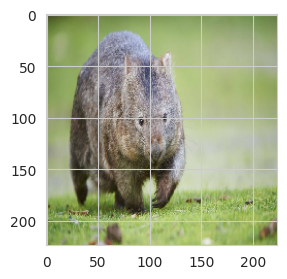

In [22]:
# preprocess an image
wombat_image = show_preprocess_image('wombat', 'vgg16')

In [23]:
# feature map and its shape
feature_map = vgg16_topless_model.predict(
    wombat_image,
    verbose=0
)
print(f'shape of feature map: {feature_map.shape}')

shape of feature map: (1, 7, 7, 512)


In [24]:
# display features
def display_features(f_map, *feature_numbers):
    """
    shows given set of image features for a given feature map
    """
    features = list(feature_numbers)
    fig, axes = plt.subplots(1, len(features), figsize=(12,4), dpi=100)
    
    for i,f in enumerate(features):
        axes[i].imshow(f_map[0, :, :, f])
        axes[i].text(0, 0, f"feature-{f}", bbox={'facecolor':'white', 'pad':5})
    
    plt.tight_layout()

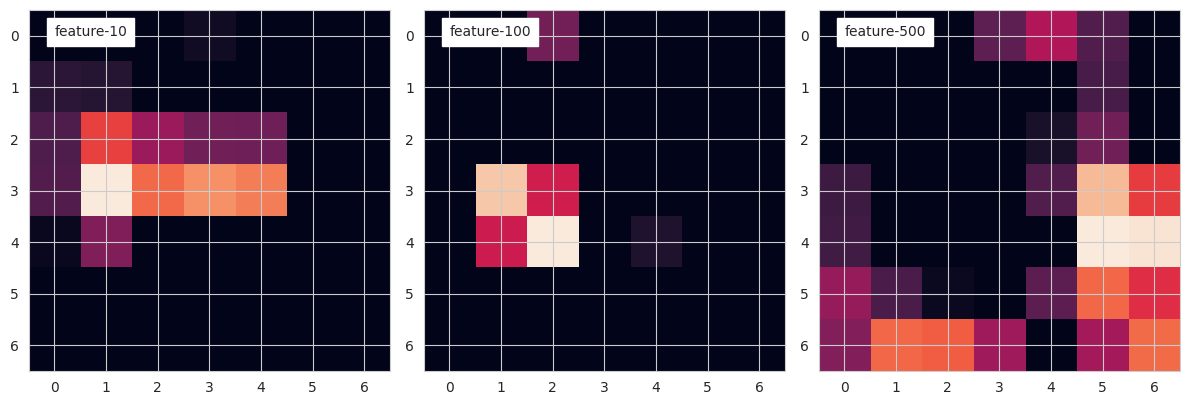

In [25]:
display_features(feature_map,10,100,500)

### 3.3 Intermediate Feature Extraction with [MobileNetV2](https://keras.io/api/applications/mobilenet/)

**Instantiate model**

In [26]:
base_model = MobileNetV2(weights='imagenet')

**Model summary**

In [27]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

**Feature extraction**

In [28]:
base_model.input 

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_4')>

In [29]:
base_model.get_layer(index=2).output

<KerasTensor: shape=(None, 112, 112, 32) dtype=float32 (created by layer 'bn_Conv1')>

In [30]:
def intermediate_feature_maps(input_image, cnn, *layers):
    """
    returns feature maps at intermediate layers of a CNN
    """
    layers = list(layers)
    
    # redefine model to output at an intermediate layer
    models = Model(
        inputs = cnn.input,
        outputs = [cnn.get_layer(index=l).output for l in layers]
    )
    feature_maps = models.predict(input_image, verbose=0)
    
    return layers, feature_maps

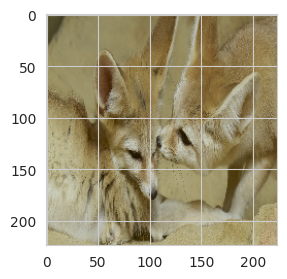

In [31]:
# show and preprocess image
desert_fox_image = show_preprocess_image('desert_fox','mobilenet_v2')

In [32]:
# feature maps at chosen layers
layers, feature_maps = intermediate_feature_maps(
    desert_fox_image,
    base_model,
    2, 30, 100
)

# shapes
for i in range(len(layers)):
    print(f"\nlayer-{layers[i]} shape: {feature_maps[i].shape}")


layer-2 shape: (1, 112, 112, 32)

layer-30 shape: (1, 57, 57, 144)

layer-100 shape: (1, 14, 14, 576)



layer-2 output


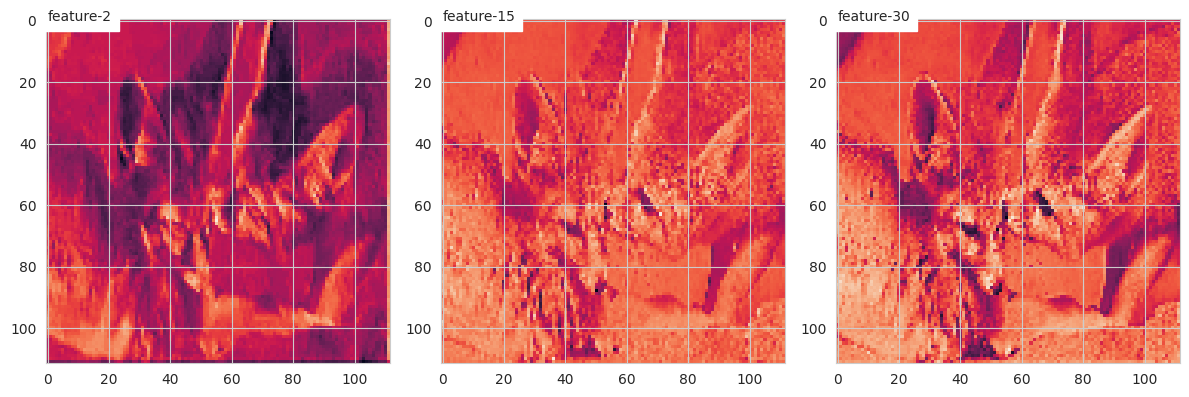

In [33]:
# feature display layer-2

print(f"\nlayer-{layers[0]} output")
display_features(feature_maps[0],2,15,30)


layer-30 output


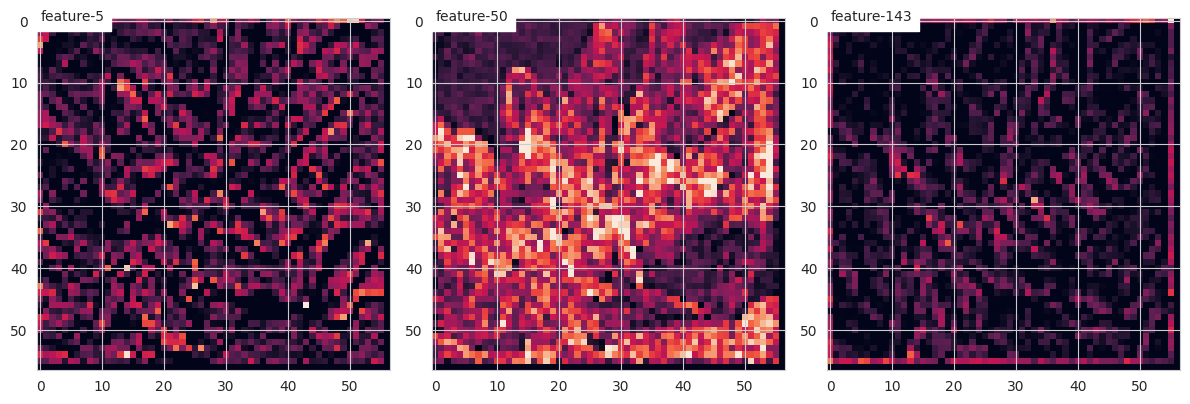

In [34]:
# feature display layer-30

print(f"\nlayer-{layers[1]} output")
display_features(feature_maps[1],5,50,143)


layer-100 output


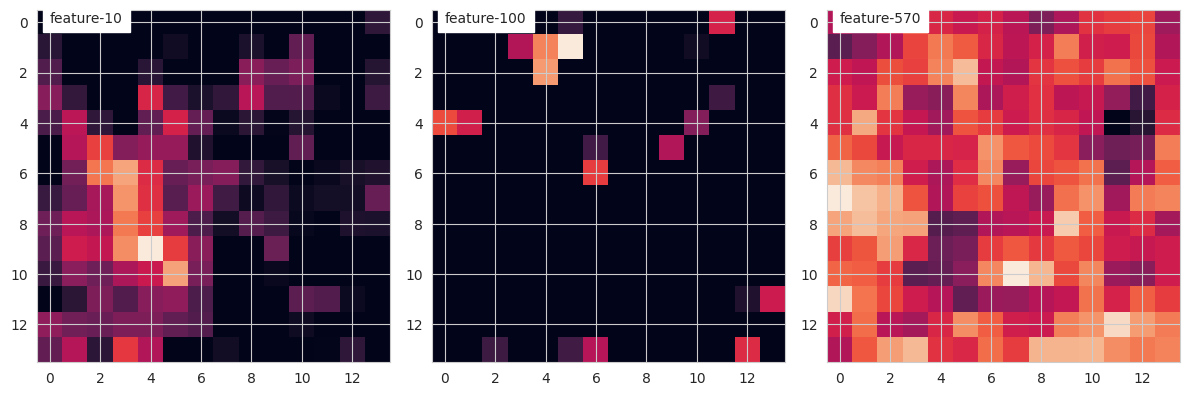

In [35]:
# feature display layer-100

print(f"\nlayer-{layers[2]} output")
display_features(feature_maps[2],10,100,570)

<hr style="border:2px solid black">

## References

1. [Pretrained Deep Neural Networks](https://www.mathworks.com/help/deeplearning/ug/pretrained-convolutional-neural-networks.html)

2. [Understanding and Calculating the number of Parameters in Convolution Neural Networks](https://towardsdatascience.com/understanding-and-calculating-the-number-of-parameters-in-convolution-neural-networks-cnns-fc88790d530d)

3. [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556)

4. [Step by step VGG16 implementation in Keras for beginners](https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c)